## **<center>Supervised Machine Learning</center>**
## <center>Introduction to Classification</center>

### LOGISTIC REGRESSION


### **WORKING ENVIRONMENT SET UP**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math

%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs


### CREATE DATA 

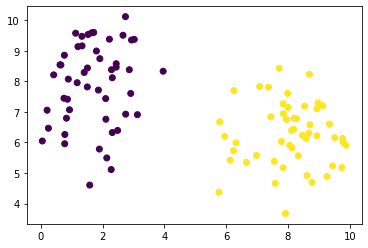

In [2]:
(X,y) =  make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=1.05,random_state=20)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.show()

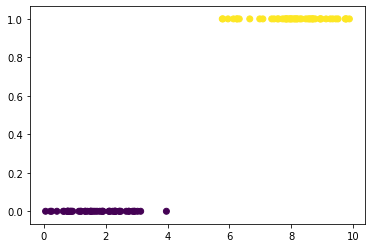

In [3]:
plt.scatter(X1[:,1],y,marker='o',c=y)
plt.show()

In [4]:
#random uniform distrubution weights
W=np.random.uniform(size=X1.shape[1])
W


array([0.89286015, 0.33197981, 0.82122912])

### DEFINE SIGMOID FUNCTION

In [5]:
def sigmoid(x):
    return float(1.0 / float((1.0 + np.exp(-1.0*x))))

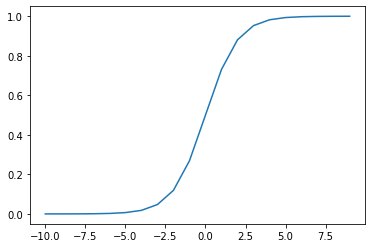

In [6]:
sx=range(-10,10)
sy=[]
for i in sx:
    sy.append(sigmoid(i))

plt.plot(sx,sy)
plt.show()

### PREDICT FUNCTION

In [7]:
def predict():
    predicted_y=[]
    
    for x in X1:
        
        logit = x.dot(W) #ϴ0+ϴ1*X
        predicted_y.append(sigmoid(logit)) 
        
    return np.array(predicted_y)

### COST FUNCTION

In [8]:
def cost_function(predicted_y):
    
    error=(-y*np.log(predicted_y)) - ((1-y)*np.log(1-predicted_y))
    cf=(1/X1.shape[0])*sum(error)
    
    return cf,error

### GRADIENT DESCENT

In [9]:
def gradient_descent(lrate,epochs):
    
    total_expected_error=float("inf")
    errorlist=[]
    finalepoch=0
    
    for epoch in range(epochs):
        global W
        
        predictedY=predict() 
        total_error,error = cost_function(predictedY)
        
        gradient=X1.T.dot(error)/X1.shape[0]
        
        if epoch%10==0:
            errorlist.append(total_error)
            finalepoch+=1
          
        if (total_expected_error<total_error):
            return errorlist,finalepoch
            
        total_expected_error=total_error
        
        for (i,w) in enumerate(gradient):
            W[i]+=float(-lrate)*w
            
    return errorlist,finalepoch

### PLOT ERROR

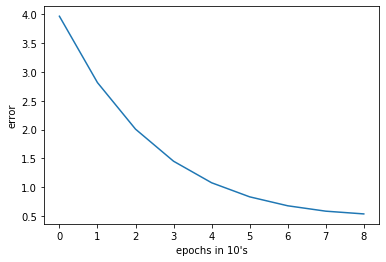

In [10]:
total_error,finalepoch=gradient_descent(0.001,10000)
#plotting 
plt.plot(range(finalepoch),total_error)
plt.xlabel("epochs in 10's")
plt.ylabel("error")
plt.show()
%matplotlib inline


In [11]:
total_error

[3.9672612861963517,
 2.8154513664158594,
 2.0073982490051567,
 1.4504623486550012,
 1.0765275632740519,
 0.83218392079185,
 0.6769473787656971,
 0.5833585433788478,
 0.5356261743437277]

In [12]:
yhat= predict() # we get the probablities scores (between 0 and 1)

#if the score is above 0.5 lets make it 1 else make it 0
for i,v in enumerate(yhat):
    if v >=0.545:  
        yhat[i]=1
    else:
        yhat[i]=0

yhat.astype(int)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [13]:
#actual y
y

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [14]:
#error and acuracy 
error=sum((yhat-y)**2)
print(error)
accuracy=1-(error/100)
accuracy

2.0


0.98

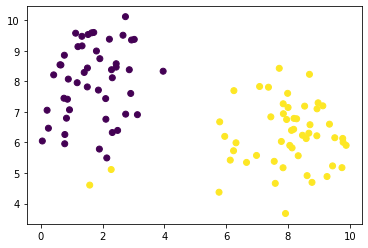

In [15]:
plt.scatter(X1[:,1],X1[:,2],marker='o',c=yhat)
plt.show()

### Scikit-Learn

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X1,y)

predict_y=clf.predict(X1)

/Users/carloseduardo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
#error and acuracy 
error=sum((predict_y-y)**2)
print(error)
accuracy=1-(error/100)
accuracy

0


1.0

In [18]:
predict_y

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

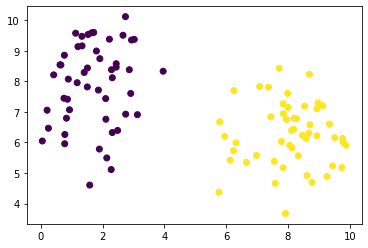

In [19]:
plt.scatter(X1[:,1],X1[:,2],marker='o',c=predict_y)
plt.show()